In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..\..').resolve())
sys.path.append(parent_path)

In [4]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.constants.events import select_sc19
from triple_agent.reports.specific.character_selection import (spy_selection,
                                                      st_selection,
                                                      amba_selection,
                                                      double_agent_selection,
                                                      determine_character_in_role)
from triple_agent.reports.specific.game_outcomes import game_outcomes
from triple_agent.classes.roles import Roles
from triple_agent.classes.outcomes import WinType
from triple_agent.classes.missions import Missions, MissionStatus
from triple_agent.reports.generation.common_sort_functions import sort_by_spy_wins, sort_by_sniper_wins
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties, PlotLabelStyle
from triple_agent.reports.specific.action_tests import action_test_percentages, diff_action_test_percentages
from triple_agent.reports.specific.mission_choices import mission_choices
from triple_agent.reports.specific.mission_completes import mission_completion_query, mission_completion, _mission_completes_details
from triple_agent.classes.action_tests import ActionTest
from collections import Counter, defaultdict

In [5]:
replays = get_parsed_replays(lambda g: g.event == "Spooky Invitational")

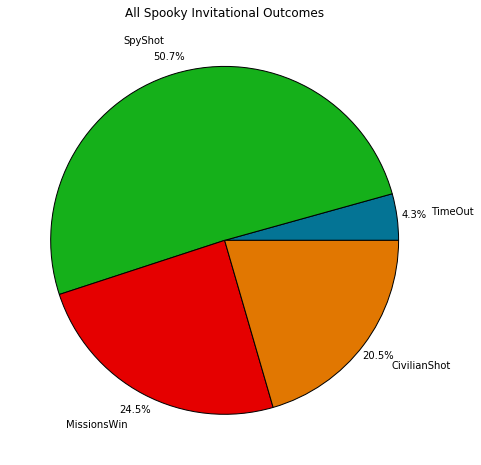

,WinType.TimeOut,WinType.SpyShot,WinType.MissionsWin,WinType.CivilianShot
NaN,12,141,68,57


In [6]:
game_outcomes(
    replays,
    axis_properties=AxisProperties(title="All Spooky Invitational Outcomes")
).frame

## Game Modes

In [58]:
def categorize_mode(r):
    return f"{r.venue} // {r.start_clock_seconds//60}:{r.start_clock_seconds%60:02d} // {r.guest_count} // {r.game_type}"

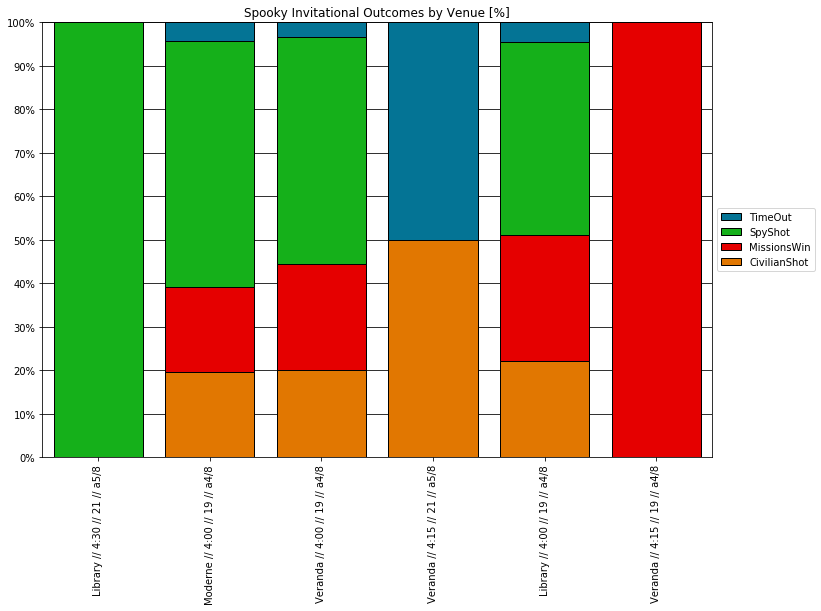

,Library // 4:30 // 21 // a5/8,Moderne // 4:00 // 19 // a4/8,Veranda // 4:00 // 19 // a4/8,Veranda // 4:15 // 21 // a5/8,Library // 4:00 // 19 // a4/8,Veranda // 4:15 // 19 // a4/8
WinType.TimeOut,0.0,0.043478,0.033333,0.5,0.044444,0.0
WinType.SpyShot,1.0,0.565217,0.522222,0.0,0.444444,0.0
WinType.MissionsWin,0.0,0.195652,0.244444,0.0,0.288889,1.0
WinType.CivilianShot,0.0,0.195652,0.200000,0.5,0.222222,0.0


In [59]:
game_outcomes(
    replays,
    DataQueryProperties(
        groupby=lambda g: categorize_mode(g),
        secondary_order=sort_by_spy_wins,
        percent_normalized_data=True),
    axis_properties=AxisProperties(
        title="Spooky Invitational Outcomes by Venue [%]"
    )
).frame

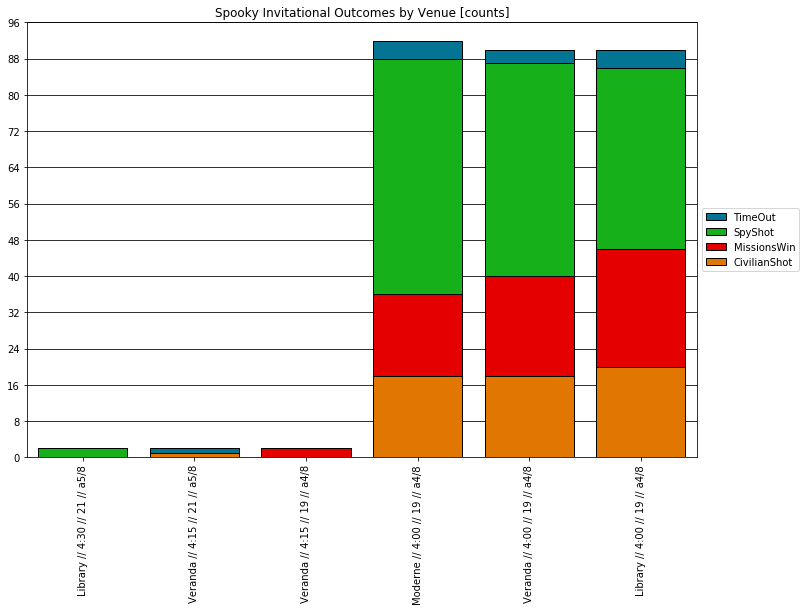

,Library // 4:30 // 21 // a5/8,Veranda // 4:15 // 21 // a5/8,Veranda // 4:15 // 19 // a4/8,Moderne // 4:00 // 19 // a4/8,Veranda // 4:00 // 19 // a4/8,Library // 4:00 // 19 // a4/8
WinType.TimeOut,0,1,0,4,3,4
WinType.SpyShot,2,0,0,52,47,40
WinType.MissionsWin,0,0,2,18,22,26
WinType.CivilianShot,0,1,0,18,18,20


In [60]:
game_outcomes(
    replays,
    DataQueryProperties(
        groupby=lambda g: categorize_mode(g),
        secondary_order=sort_by_spy_wins,
    ),
    axis_properties=AxisProperties(
        title="Spooky Invitational Outcomes by Venue [counts]"
    )
).frame

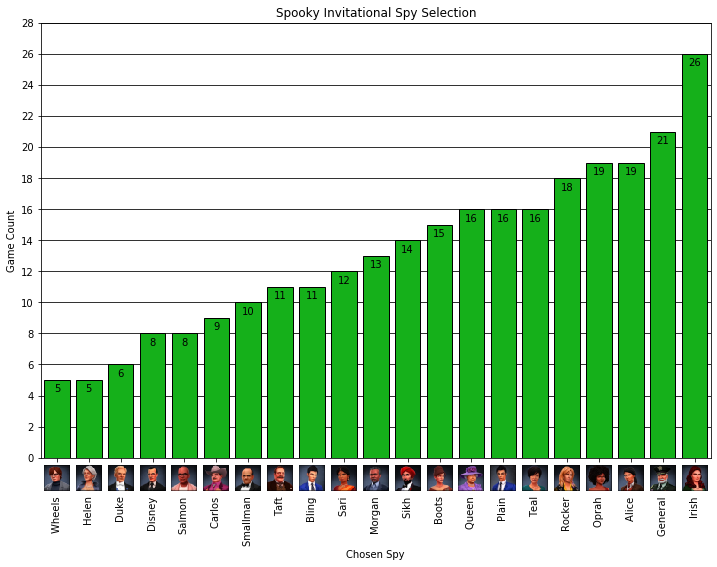

In [9]:
_ = spy_selection(
    replays,
    axis_properties = AxisProperties(
        title="Spooky Invitational Spy Selection",
        x_axis_portrait=True,
        y_axis_label="Game Count",
        x_axis_label="Chosen Spy",
    ),
    data_query = DataQueryProperties(
        primary_order=sum,
    )
)

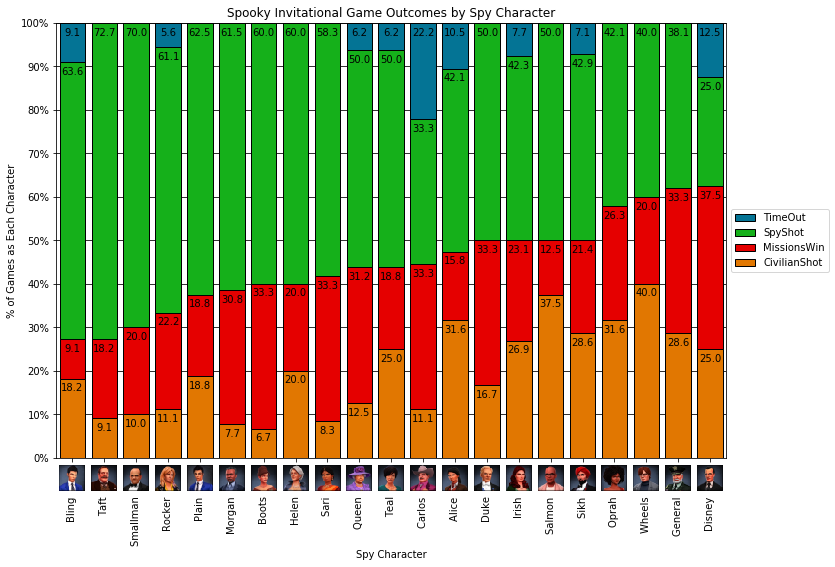

In [52]:
_ = game_outcomes(
    replays,
    axis_properties = AxisProperties(
        title="Spooky Invitational Game Outcomes by Spy Character",
        x_axis_portrait=True,
        y_axis_label="% of Games as Each Character",
        x_axis_label="Spy Character",
        data_label_style=PlotLabelStyle.Plain,
    ),
    data_query = DataQueryProperties(
        groupby=lambda g: determine_character_in_role(g, Roles.Spy),
        secondary_order=sort_by_spy_wins,
        percent_normalized_data=True
    )
)

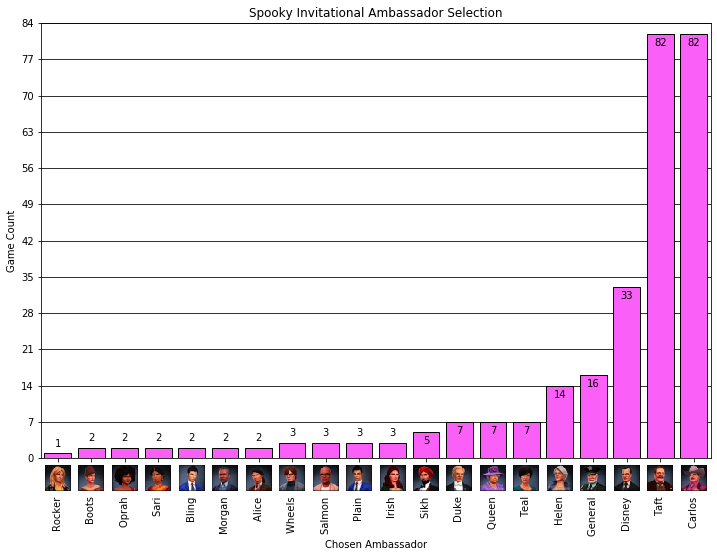

In [53]:
_ = amba_selection(
    replays,
    axis_properties = AxisProperties(
        title="Spooky Invitational Ambassador Selection",
        x_axis_portrait=True,
        y_axis_label="Game Count",
        x_axis_label="Chosen Ambassador",
    ),
    data_query = DataQueryProperties(
        primary_order=sum,
    )
)

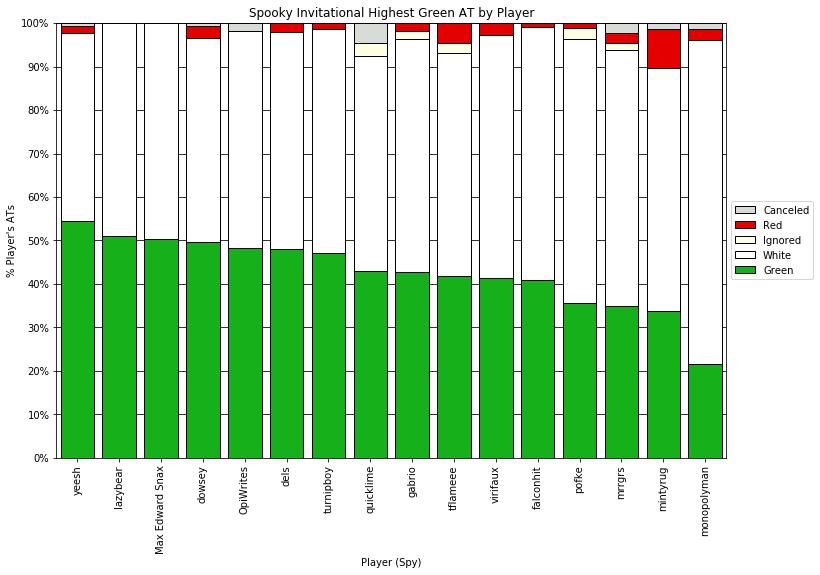

In [54]:
_ = action_test_percentages(
    replays,
    axis_properties = AxisProperties(
        title='Spooky Invitational Highest Green AT by Player',
        x_axis_label='Player (Spy)',
        y_axis_label='% Player\'s ATs',
    ),
    data_query = DataQueryProperties(
        groupby=lambda g: g.spy,
        secondary_order=lambda name_series: -name_series[1][ActionTest.Green],
        limit=30,
        reverse_primary_order=True,
        percent_normalized_data=True)    
)

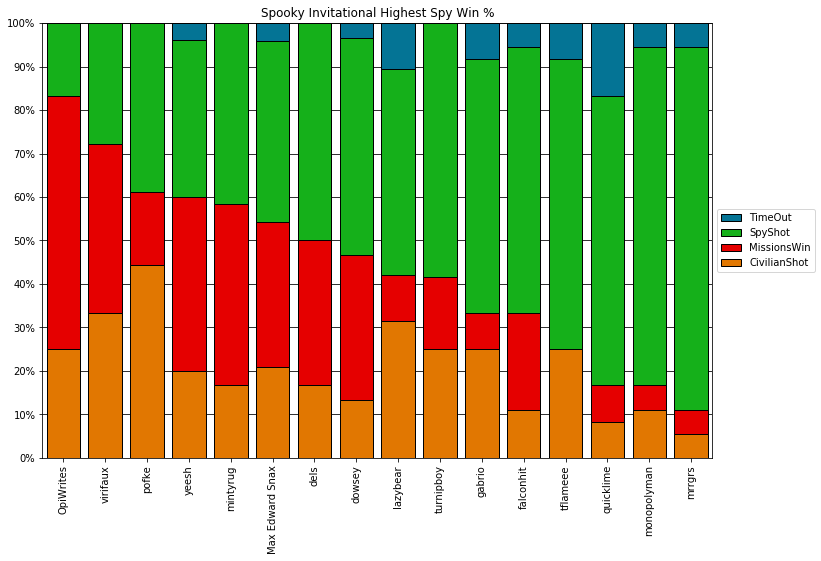

In [55]:
spy_winr = game_outcomes(
    replays,
    DataQueryProperties(
        groupby=lambda g: g.spy,
        secondary_order=sort_by_spy_wins,
        reverse_secondary_order=True,
        limit=30,
        percent_normalized_data=True),
    axis_properties=AxisProperties(title="Spooky Invitational Highest Spy Win %")
)

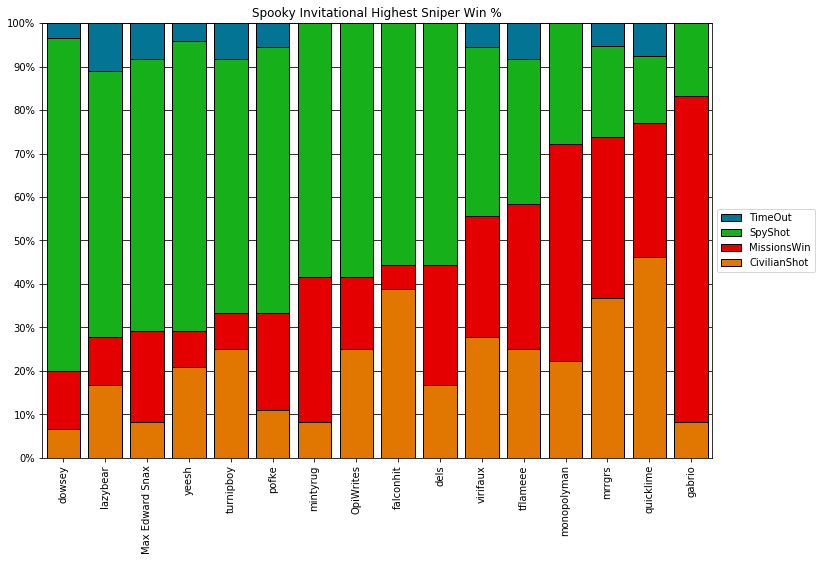

In [56]:
_ = game_outcomes(
    replays,
    DataQueryProperties(
        groupby=lambda g: g.sniper,
        secondary_order=sort_by_sniper_wins,
        reverse_secondary_order=True,
        limit=30,
        percent_normalized_data=True),
    axis_properties=AxisProperties(title="Spooky Invitational Highest Sniper Win %")
)

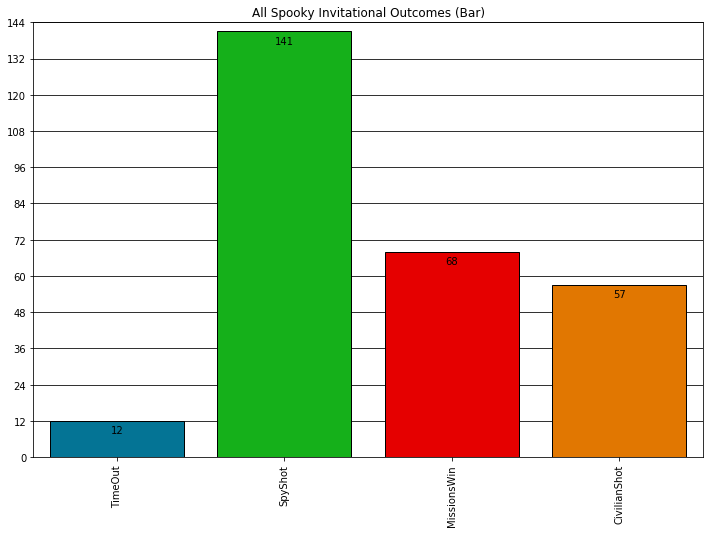

In [17]:
_ = game_outcomes(
    replays,
    axis_properties=AxisProperties(
        title="All Spooky Invitational Outcomes (Bar)",
        force_bar=True,
        data_label_style=PlotLabelStyle.Plain,
    )
)

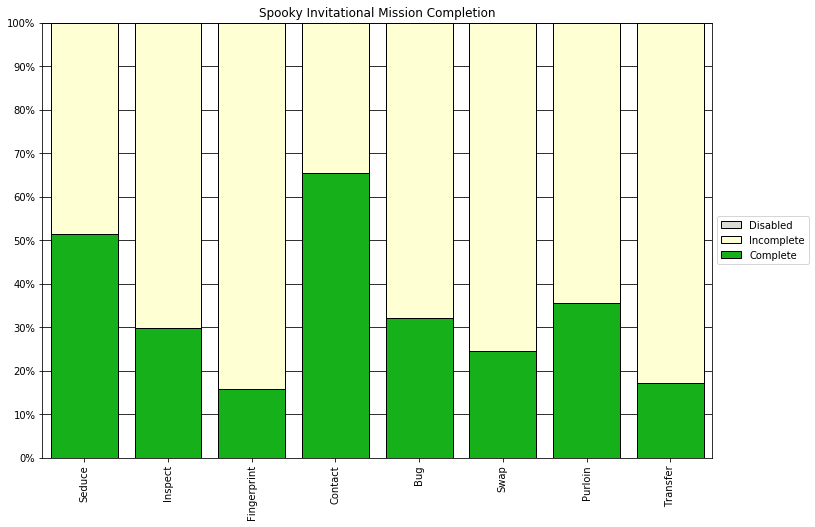

In [57]:
mission_completion(replays, "Spooky Invitational Mission Completion")